## Introduction

**We use the Boston dataset for predicting house price.**


### Attribute Information
Attribute Information (in order):
   - CRIM     per capita crime rate by town
   - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
   - INDUS    proportion of non-retail business acres per town
   - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   - NOX      nitric oxides concentration (parts per 10 million)
   - RM       average number of rooms per dwelling
   - AGE      proportion of owner-occupied units built prior to 1940
   - DIS      weighted distances to five Boston employment centres
   - RAD      index of accessibility to radial highways
   - TAX      full-value property-tax rate per 10,000 USD
   - PTRATIO  pupil-teacher ratio by town
   - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
   - LSTAT    percent lower status of the population
   - MEDV     Median value of owner-occupied homes in $1000's

### Description of the task
The task is to produce a machine learning model to predict the median price of a house ( in 1000's of USD) called 'MEDV' given the rest of the features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [4]:
from google.colab import drive
drive.mount('/gdrive')
df = pd.read_csv('/gdrive/My Drive/Colab/Boston House Price Prediction/boston_house_prices.csv', header = 1)
df

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Sanity check on data

In [ ]:
# get the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


We see that all variables are numerical having correct datatypes which looks good for this dataset

In [ ]:
# Identify the columns having null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values in this datsset

In [ ]:
# get the numerical descriptives
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## EDA

**Univariate Analysis**

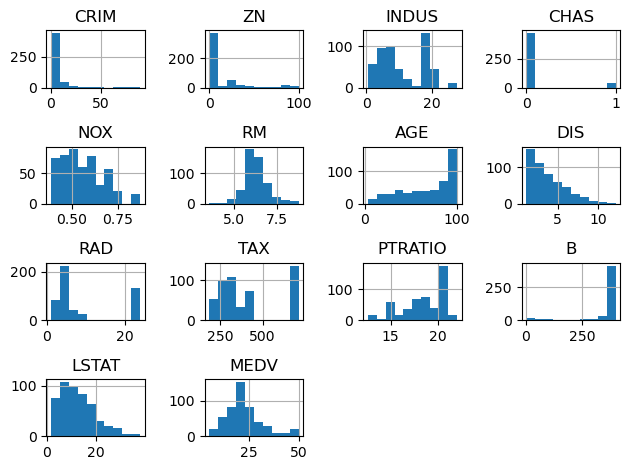

In [ ]:
df.hist()
plt.tight_layout()

The target variable 'MEDV' is approximately normally distributed

<Axes: xlabel='CHAS', ylabel='MEDV'>

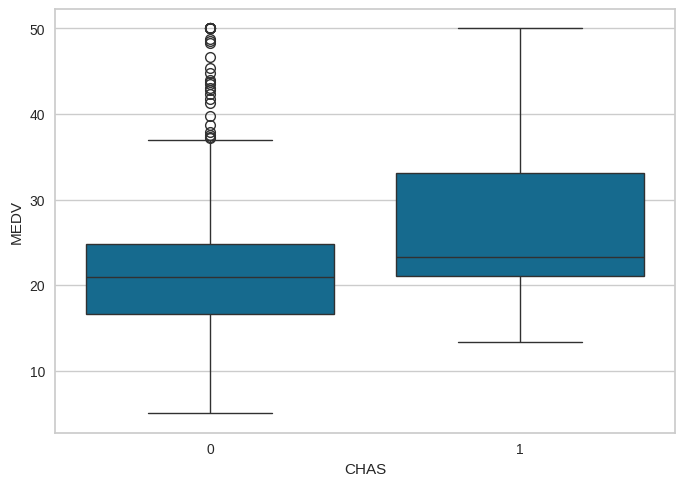

In [11]:
sns.boxplot(y = df['MEDV'], x= df['CHAS'])

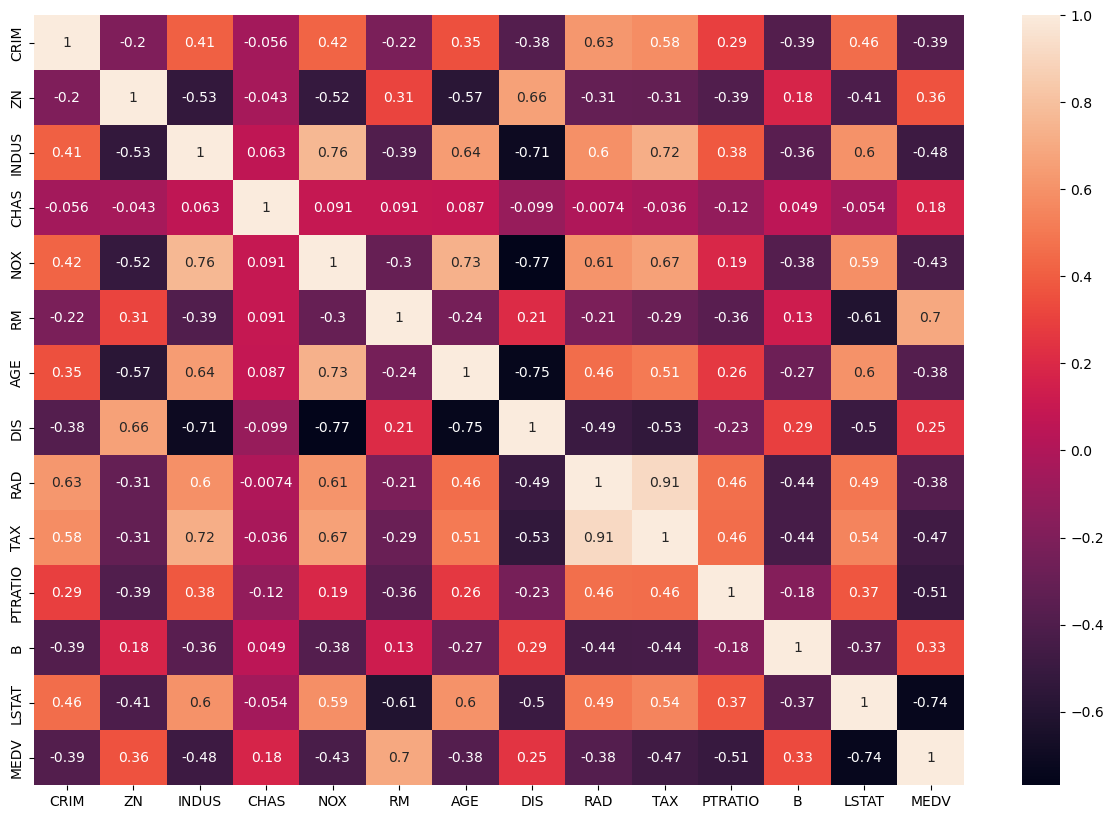

In [ ]:
#Create a correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- We see that RM and LSTAT have high correlation with MEDV
- We note that CHAS has very low correlation with MEDV so we may drop it for the modelling

### Pre-processing for multiple linear regression

In [3]:
# Seperate the features and the target

X= df.drop('MEDV', axis=1)
y= df.MEDV

Since there are no missing values or categorical variable we got tjhe next step whcih is train-test-split

In [4]:
# Do the train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=401)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [5]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Fit the regression models on training set

**Multiple Linear Regression model**

In [ ]:
model_lr=LinearRegression()

# fit the model to the training set
model_lr.fit(x_train, y_train)

# making prediction on the testing set
y_pred=model_lr.predict(x_test)

### Evaluate the model performance on the Test set

In [ ]:
# let us create a function for evaluation

def evaluate(y_test, y_pred, model_name):
    print("The model metrics are below for the "+model_name)
    print('')
    print("The R2 score is ", r2_score(y_test, y_pred))
    print("")
    print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("")
    print("The mean absolute error is ", mean_absolute_error(y_pred, y_test))
    print("")

In [ ]:
# Evaluate the metrics for the OLS model
evaluate(y_test, y_pred, "OLS Full Model")

The model metrics are below for the OLS Full Model

The R2 score is  0.6565411782057888

The root mean squared error is  6.140452565425057

The mean absolute error is  4.122753493220688



**Trying other Regression Models**

In [ ]:
# We first use Decision Tree Regressor which is an entropy based model
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()
model_dt.fit(x_train, y_train)
y_pred=model_dt.predict(x_test)
evaluate(y_test, y_pred, 'Decision Tree Regressor')

The model metrics are below for the Decision Tree Regressor

The R2 score is  0.67138682241199

The root mean squared error is  6.006279393839646

The mean absolute error is  3.583333333333334



In [ ]:
# next we make a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred=model_rf.predict(x_test)
evaluate(y_test, y_pred, 'Random Forest Regressor')

The model metrics are below for the Random Forest Regressor

The R2 score is  0.8680551486840743

The root mean squared error is  3.805916597491177

The mean absolute error is  2.4366960784313716



In [ ]:
from sklearn.svm import SVR
model_svr=SVR()
model_svr.fit(x_train, y_train)
y_pred=model_svr.predict(x_test)
evaluate(y_test, y_pred, 'Support Vector Regressor')

The model metrics are below for the Support Vector Regressor

The R2 score is  0.5732422177930907

The root mean squared error is  6.844689751240743

The mean absolute error is  3.9970708151381142



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()
model_knn.fit(x_train, y_train)
y_pred=model_knn.predict(x_test)
evaluate(y_test, y_pred, 'K Nearest Neighbors')

The model metrics are below for the K Nearest Neighbors

The R2 score is  0.5850273982955643

The root mean squared error is  6.749517920330514

The mean absolute error is  3.7247058823529406



In [ ]:
from xgboost import XGBRegressor
model_xgb=KNeighborsRegressor()
model_xgb.fit(x_train, y_train)
y_pred=model_xgb.predict(x_test)
evaluate(y_test, y_pred, 'XGBRegressor')

The model metrics are below for the XGBRegressor

The R2 score is  0.5850273982955643

The root mean squared error is  6.749517920330514

The mean absolute error is  3.7247058823529406



**We see that Random  Forest Regressor performs the best with 87% R2 Score and should be the model of choice for us. We would need to regularize and optimize this model using GridSearchCV before deployment**

**Optimize the Random Forest Model using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,150,200] ,
            'min_samples_leaf' : range(1,5,1),
            'min_samples_split' : range(2,10,2),
            'max_depth' : range(5,50,5),
            'max_features': ['log2', 'sqrt']}
n_folds=3
cv= GridSearchCV(estimator=model_rf,param_grid=param_grid,cv=n_folds,verbose=3, n_jobs=-1, return_train_score=True)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(5, 50, 5),
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, verbose=3)

In [ ]:
cv.best_score_

0.8519164312211053

In [ ]:
cv.best_estimator_

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=200)

In [ ]:
tuned_model_rf=cv.best_estimator_
tuned_model_rf.fit(x_train, y_train)
y_pred=tuned_model_rf.predict(x_test)
evaluate(y_test, y_pred, 'Tuned Random Forest')

The model metrics are below for the Tuned Random Forest

The R2 score is  0.8531559692736704

The root mean squared error is  4.0150521580477365

The mean absolute error is  2.52460669914856



### Interpretation of the model

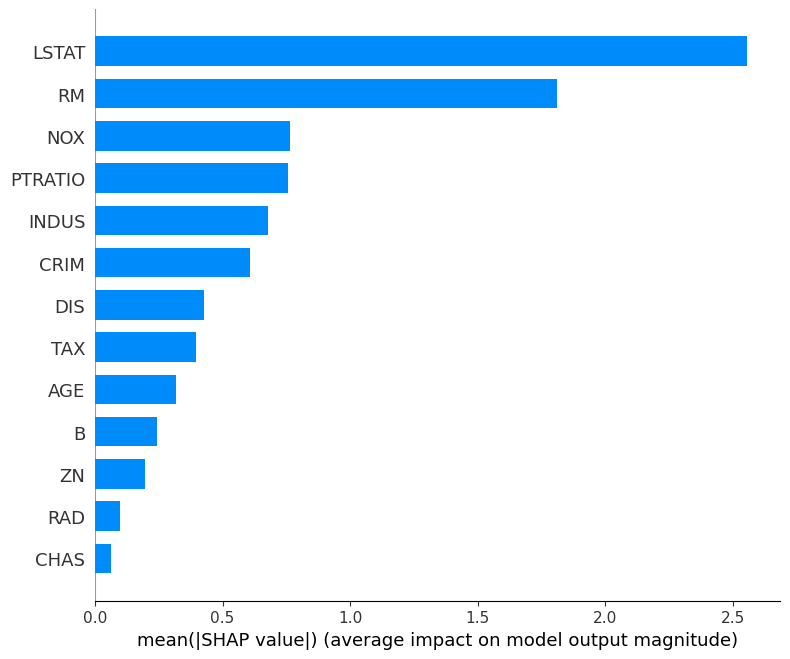

In [ ]:
import shap
names=X.columns
value=shap.TreeExplainer(tuned_model_rf).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=names)

We see that the most important features for predicting house price are LSTAT and RM ( the average number of rooms) which is quite logical

### Deploy the Regression Model using Pycaret and Streamlit

In [6]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [1]:
!pip install streamlit --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [5]:
import pycaret
#import regression module
from pycaret.regression import *
#intialize the setup
exp_reg = setup(df, target = 'MEDV')

,Description,Value
0,Session id,8626
1,Target,MEDV
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [6]:
# compare different regression models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1383,10.5197,3.1111,0.8713,0.1439,0.1111,0.2040
gbr,Gradient Boosting Regressor,2.2185,10.3784,3.1436,0.8657,0.1515,0.1192,0.1510
rf,Random Forest Regressor,2.2759,12.2825,3.3819,0.8494,0.1549,0.1187,0.3200
xgboost,Extreme Gradient Boosting,2.3555,13.0411,3.4769,0.8432,0.1566,0.1207,0.2730
lightgbm,Light Gradient Boosting Machine,2.3062,13.4037,3.4997,0.8424,0.1591,0.1194,0.4370
ada,AdaBoost Regressor,2.9281,16.9612,4.0406,0.7718,0.1954,0.1634,0.1840
br,Bayesian Ridge,3.3483,23.5410,4.6865,0.6985,0.2450,0.1797,0.0370
ridge,Ridge Regression,3.3421,23.2243,4.6731,0.6972,0.2481,0.1801,0.0230
lr,Linear Regression,3.3661,23.2267,4.6839,0.6959,0.2525,0.1811,0.5080
lar,Least Angle Regression,3.3823,23.2333,4.6916,0.6948,0.2572,0.1821,0.0260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=8626)

In [13]:
# create a 10 fold cross validation random forest regressor
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1534,11.0091,3.3180,0.8510,0.1541,0.1081
1,1.8802,6.0457,2.4588,0.8184,0.1347,0.1043
2,1.7509,4.1632,2.0404,0.9036,0.1031,0.0941
3,2.8479,19.0726,4.3672,0.8766,0.1577,0.1129
4,2.8920,26.0253,5.1015,0.7829,0.1694,0.1182
5,2.2176,11.0531,3.3246,0.9121,0.1641,0.1295
6,1.8516,7.3575,2.7125,0.9103,0.1152,0.0880
7,1.7731,4.8617,2.2049,0.9424,0.1140,0.0961
8,1.8300,7.2195,2.6869,0.9027,0.1614,0.1252


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
# tune the model
tuned_rf=tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7221,15.4580,3.9317,0.7908,0.2147,0.1625
1,2.5089,8.4114,2.9002,0.7474,0.1431,0.1341
2,3.0344,13.5484,3.6808,0.6863,0.2025,0.1821
3,5.1672,62.7506,7.9215,0.5940,0.2635,0.2047
4,4.2103,47.6498,6.9029,0.6026,0.2404,0.1804
5,3.8106,30.7912,5.5490,0.7551,0.2632,0.2261
6,2.9091,16.1305,4.0163,0.8034,0.1601,0.1324
7,3.0595,18.5808,4.3105,0.7798,0.2024,0.1729
8,2.7672,15.1506,3.8924,0.7958,0.2276,0.1925


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
tuned_rf

ExtraTreesRegressor(n_jobs=-1, random_state=8626)

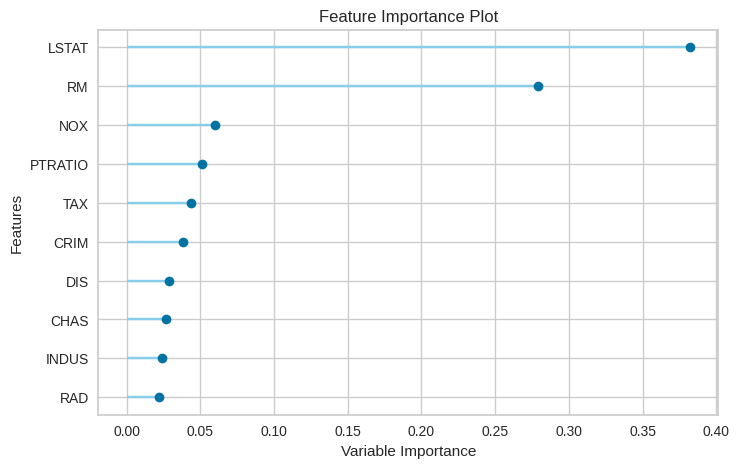

In [15]:
# interpret the model
plot_model(tuned_rf, plot='feature')

In [16]:
# save the model
save_model(tuned_rf, 'Final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                              'TAX', 'PTRATIO', 'B', 'LSTAT'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=8626))]),
 'Final_model.pkl')

# Deployment in Streamlit

In [19]:
!pip install pyngrok

In [31]:
%%writefile app.py
import pandas as pd
import streamlit as st
from pycaret.regression import load_model, predict_model

# import the trained model
model=load_model('Final_model')

# GET NEW DATA FOR PREDICTION FROM THE FRONT END
st.title("App to predict the house prices")
crim=st.slider('CRIM', 0.001, 100.0)
zn=st.slider('ZN',0.001, 100.0)
indus=st.slider('INDUS', 0.5, 28.0)
chas=st.selectbox('CHAS', [0,1])
nox=st.slider('NOX',0.4, 0.8)
rm=st.slider('RM', 3,9)
age=st.slider('AGE',2.9, 100.0)
dis=st.slider('DIS', 1.1, 12.1)
rad=st.slider('RAD',0,28)
tax=st.slider('TAX',187,800)
ptratio=st.slider('PRATIO',12.6, 22.0)
b=st.slider('B',0.3, 397.0)
lstat=st.slider('LSTAT', 1.7, 40.0)

data={
    'CRIM':crim,
    'ZN':zn,
    'INDUS':indus,
    'CHAS':chas,
    'NOX':nox,
    'RM':rm,
    'AGE':age,
    'DIS':dis,
    'RAD':rad,
    'TAX':tax,
    'PTRATIO':ptratio,
    'B':b,
    'LSTAT':lstat
}

input_data=pd.DataFrame([data])
#input_data=str(input_data)

# GET THE PREDICTION AND DISPLAY IT
if st.button("Predict"):
    prediction=predict_model(model, input_data)
    st.success("The predicted price of the house in 1000's of $ is as below")
    prediction['Label'][0]

Overwriting app.py


In [23]:
from pyngrok import ngrok

!ngrok authtoken 2k948xX76L8KshR39EvIsKZXaqo_2svz95xWRZQxGqEfkX6XZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [34]:
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://df85-34-171-132-239.ngrok-free.app" -> "http://localhost:8501">

In [35]:
!streamlit run app.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.171.132.239:8501

Transformation Pipeline and Model Successfully Loaded
  Stopping...


Note: To run this app locally:
1. Open a new Anaconda Prompt
2. Activate the virual environment by typing **activate venv**
3. pip install --pre pycaret
4. pip install streamlit --upgrade
3. cd to the current directory where app.py exists
4. Type the code **streamlit run app.py**

# END